# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

In [8]:
! git clone https://github.com/pratistha-dhungana/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 79 (delta 20), reused 6 (delta 6), pack-reused 39 (from 1)
Receiving objects: 100% (79/79), 13.85 MiB | 12.03 MiB/s, done.
Resolving deltas: 100% (25/25), done.


**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [9]:
#Question 1.1
import pandas as pd
import numpy as np
import seaborn as sns

url = 'https://raw.githubusercontent.com/pratistha-dhungana/wrangling/refs/heads/main/assignment/data/airbnb_hw.csv'
df = pd.read_csv(url)


df['Price'] = df['Price'].str.replace(r'[$,]', '', regex=True).astype(float) # this removes $ and , and replaces that with empty string
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') #converts it to numeric
missing_values = df['Price'].isna().sum() # counts the total missing values
print(f"Missing values in 'Price': {missing_values}")

df.head()





Missing values in 'Price': 0


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145.0,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37.0,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28.0,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199.0,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549.0,96.0


In [10]:
#Question 1.2

import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/pratistha-dhungana/wrangling/main/assignment/data/mn_police_use_of_force.csv'
df = pd.read_csv(url)


df['subject_injury'] = df['subject_injury'].replace({
    'Unknown': np.nan,
    'Injured': 'Yes',
    'Not injured': 'No'
}) #handles all the missing values.
missing_values = df['subject_injury'].isna().sum() # sum of all the missing values
print(f"Missing values in 'subject_injury': {missing_values}")
missing_proportion = missing_values / len(df)
print(f"Proportion of missing values in 'subject_injury': {missing_proportion}")

cross_tab = pd.crosstab(df['subject_injury'], df['force_type'])
print("\nCross-tabulation of subject_injury and force_type:")
print(cross_tab)

df['missing_subject_injury'] = df['subject_injury'].isna()  # Convert to True/False

missing_cross_tab = pd.crosstab(df['missing_subject_injury'], df['force_type'])
print("\nCross-tabulation of MISSING subject_injury and force_type:")
print(missing_cross_tab)

# This is [] a concern. There seems to [ be a pattern]. We can see this in []

Missing values in 'subject_injury': 9848
Proportion of missing values in 'subject_injury': 0.7619342359767892

Cross-tabulation of subject_injury and force_type:
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal Projectile  \
subject_injury                                                                 
No                             33                 34                       1   
Yes                            44                 40                       2   

force_type      Police K9 Bite  Taser  
subject_injury                         
No                           2    150  
Yes                         44    172  

Cross-tabulation of MISSING subject_injury and force_type:
force_type              Bato

In [11]:
# Question 1.3
import pandas as pd
df = pd.read_parquet('./wrangling/assignment/data/justice_data.parquet')
released = df['WhetherDefendantWasReleasedPretrial']
print(released.unique(),'\n')
print(released.value_counts(),'\n')
released = released.replace(9,np.nan) #replaces 9 to np.nan as the values are unclear
print(released.value_counts(),'\n')
sum(released.isnull()) # checks the amount of null values
df['WhetherDefendantWasReleasedPretrial'] = released # replaces the old data column with cleaned ones
del released

[9 0 1] 

WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64 

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
Name: count, dtype: int64 



In [12]:
# Question 1.4

import pandas as pd
import numpy as np

length = pd.to_numeric(df['ImposedSentenceAllChargeInContactEvent'], errors='coerce')  # converts to number
type_col = df['SentenceTypeAllChargesAtConvictionInContactEvent']  # renamed so it won’t conflict with python

print(f"Missing values before transformation: {length.isna().sum()} of {len(length)}\n") # checks missing values before the transformation

# Crosstab of missing values and sentence type
print(pd.crosstab(length.isna(), type_col), '\n')

# Apply transformations
length.where(type_col != 4, 0, inplace=True)  # Set to 0 if type == 4
length.where(type_col != 9, np.nan, inplace=True)  # Set to NaN if type == 9

print(f"Missing values after transformation: {length.isna().sum()} of {len(length)}\n") # checks missing values after transformation
print(pd.crosstab(length.isna(), type_col), '\n')

df['ImposedSentenceAllChargeInContactEvent'] = length #replaces original with new cleaned data

# Cleanup temporary variables
del length, type_col


Missing values before transformation: 9053 of 22986

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent                                      
False                                             8720  4299  914     0    0
True                                                 0     0    0  8779  274 

Missing values after transformation: 274 of 22986

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent                                      
False                                             8720  4299  914  8779    0
True                                                 0     0    0     0  274 



**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Typ4e` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [20]:
# Question 2.1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


file_path = "GSAF5.xls"
df = pd.read_excel(file_path)
df.head()



,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-02-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Blasck Wall Reach Swan River Perth,Kayaking,Georgina Smith,F,35,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-02-22 00:00:00,2025.0,Questionable,Australia,NSW,Off Port Stephens near Newcastle,Fishing was pulled of boat by shark,Paul Barning,M,58,...,Mako shark,Simon De Marchi: Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-02-22 00:00:00,2025.0,Unprovoked,Australia,Queensland,The Wrecks walking track Moreton Island,Snorkeling,Unknown Male,M,29,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-02-10 00:00:00,2025.0,Unprovoked,Bahamas,NaN,Bimini Bay,Swimming,Summer Layman,F,24,...,bull shark,Dail Mail Australia Todd Smith: Kevin McMurray...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-02-10 00:00:00,2025.0,Unprovoked,Bahamas,NaN,Bimini Bay,Swimming,Rileigh Decker,F,20,...,bull shark,Dail Mail Australia Todd Smith: Kevin McMurray...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Question 2.
df = df.dropna(axis=1, how='all')
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-02-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Blasck Wall Reach Swan River Perth,Kayaking,Georgina Smith,F,35,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-02-22 00:00:00,2025.0,Questionable,Australia,NSW,Off Port Stephens near Newcastle,Fishing was pulled of boat by shark,Paul Barning,M,58,...,Mako shark,Simon De Marchi: Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-02-22 00:00:00,2025.0,Unprovoked,Australia,Queensland,The Wrecks walking track Moreton Island,Snorkeling,Unknown Male,M,29,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-02-10 00:00:00,2025.0,Unprovoked,Bahamas,NaN,Bimini Bay,Swimming,Summer Layman,F,24,...,bull shark,Dail Mail Australia Todd Smith: Kevin McMurray...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-02-10 00:00:00,2025.0,Unprovoked,Bahamas,NaN,Bimini Bay,Swimming,Rileigh Decker,F,20,...,bull shark,Dail Mail Australia Todd Smith: Kevin McMurray...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Year range: 0.0 to 2026.0


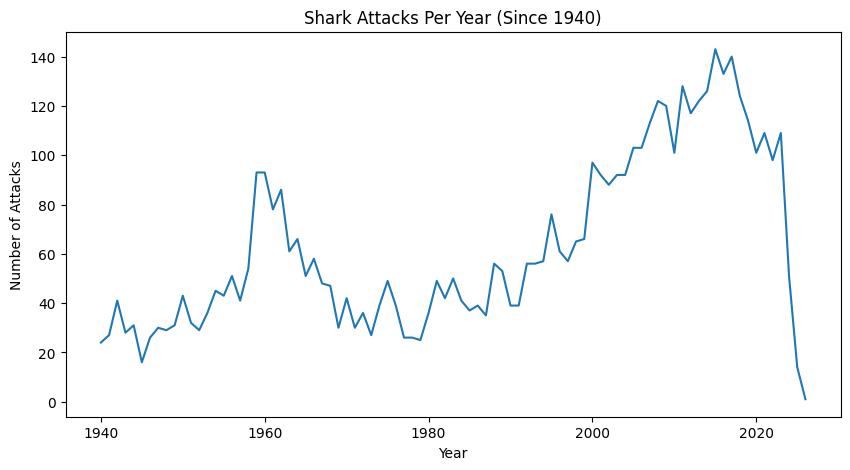

In [22]:
# Question 2.3
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # converts to numbers
print(f"Year range: {df['Year'].min()} to {df['Year'].max()}")  # range of values

# filters for attacks only 1940
df = df[df['Year'] >= 1940]

# plot trends in shark attacks over time
df.groupby('Year').size().plot(title="Shark Attacks Per Year (Since 1940)", figsize=(10, 5))
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.show()

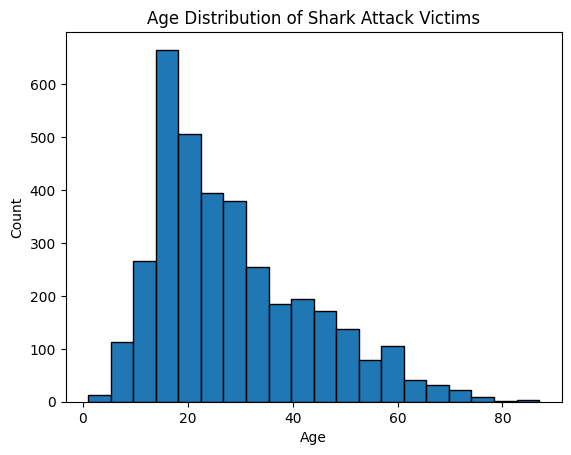

In [26]:
# Question 2.4
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # convert Age to numeric

plt.hist(df['Age'].dropna(), bins=20, edgecolor="black")
plt.title("Age Distribution of Shark Attack Victims")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


In [27]:
# Question 2.5
df['Sex'] = df['Sex'].str.strip().str.upper()  # makes sure its all upper case
male_count = df[df['Sex'] == 'M'].shape[0]
total_count = df['Sex'].notna().sum()
male_proportion = male_count / total_count
print(f"Proportion of male victims: {male_proportion:.2%}")

Proportion of male victims: 85.77%


In [32]:
# Question 2.6
df['Type'] = df['Type'].str.strip().str.lower().map({'provoked': 'Provoked', 'unprovoked': 'Unprovoked'})

df.loc[:, 'Type'] = df['Type'].fillna('Unknown')

# calculate proportion
unprovoked_proportion = (df['Type'] == 'Unprovoked').mean()

# shows the result
print(f"Proportion of unprovoked attacks: {unprovoked_proportion:.2%}")



Proportion of unprovoked attacks: 74.31%


In [33]:
# Question 2.7

df['Fatal Y/N'] = df['Fatal Y/N'].str.strip().str.upper()
df.loc[:, 'Fatal Y/N'] = df['Fatal Y/N'].map({'Y': 'Y', 'N': 'N'}).fillna('Unknown')


In [34]:
# Question 2.8
print(pd.crosstab(df['Sex'], df['Type'], normalize='index') * 100)
print(pd.crosstab(df['Sex'], df['Fatal Y/N'], normalize='index') * 100)
print(pd.crosstab(df['Type'], df['Fatal Y/N'], normalize='index') * 100)

Type    Provoked     Unknown  Unprovoked
Sex                                     
F       3.932584   11.095506   84.971910
LLI     0.000000    0.000000  100.000000
M      10.362454   12.546468   77.091078
M X 2   0.000000  100.000000    0.000000
Fatal Y/N           N     Unknown          Y
Sex                                         
F           79.213483    8.286517  12.500000
LLI        100.000000    0.000000   0.000000
M           77.346654    7.504647  15.148699
M X 2        0.000000  100.000000   0.000000
Fatal Y/N           N    Unknown          Y
Type                                       
Provoked    95.752896   1.737452   2.509653
Unknown     41.262683  45.095829  13.641488
Unprovoked  81.894219   1.303813  16.801968


Unprovoked attacks are more common for women (84.97%) than men (77.09%). However, men experience a higher percentage of provoked attacks (10.36%) compared to women (3.93%), which suggests that men may engage in activities that provoke sharks more often. Unprovoked attacks are more likely to be fatal (16.80%) when compared with provoked attacks (2.51%). Men are more likely to die from shark attacks (15.14%) then female (12.50%). I think sharks are fine. We should try not to bother them or disrupt their environment as they try not to hunt for humans.

In [35]:
# Question 2.9
df.columns = df.columns.str.strip()

df['Species'] = df['Species'].astype(str).str.lower().str.strip()

df['White Shark'] = df['Species'].str.contains(r'\bwhite\b', na=False)

white_shark_proportion = df['White Shark'].mean()

print(f"Proportion of attacks by white sharks: {white_shark_proportion:.2%}")


Proportion of attacks by white sharks: 12.16%


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

3.1
This paper talks about how cleaning data specifically data tidying is important as a tidy data helps user to manipulate, model and visualize it and be used in an efficient way.

3.2
The tidy data standard is intended to bridge the gap between statistician and data cleaning tools. It provides the framework in a langauge easier to understand.

3.3
The first sentence explains that a tidy dataset MUST have the same specific characterstics, similar to happy/good families. On the other hand, for a dataset to be messy, it can be because of anything: missing or incorrect values, bad format, e.t.c. The second sentence talks about the general confusion between observation and variables. When we look at a dataset, it’s usually easy to tell which parts are variables and which are observations. For example, rows might represent observations and columns might be variables. But if we’re just given raw, unstructured data, it’s not always clear what should be considered a variable or an observation especially if given without context.

3.4
He defines values to be either numbers (quantitive) or strings (qualitatives) and can be organized to be variable and or observation. Variable contains values that all measures the same attribuites like height and temperature. On the other hand, an observation contains values that are measured in the same unit across all attribuites like dollars, a person, a day.

3.5
Tidy data is set to have the following characterstics: <br>
1. Each variable forms a column <br>
2. Each observation forms a row <br>
3. Each type of observation unit forms a table <br>

3.6
The 5 most common problems with messy datasets are as follows: <br>
a. Column headlines are values and not variable names. <br>
b. Multiple variables are stored in one column.  <br>
c. Variables are stored in both rows and columns. <br>
d. Multiple types of observational units are stored in same table <br>
e. Single observational units are stored in multiple tables. <br>
The data in table 4 is messy because variables form both rows and columns and column header are values not variable names. A melting dataset is one where the values in column is named as variable for example in table 4, we converted the actual income that were spread across rows to just income and wrote its values down in column.

3.7 Table 11 is messy because, once again columns from day 1 - day 8 have mostly missing values and can be presented in better ways. It has also put the values to be column names. Similarly, year month and day can be all simplified to a data in [yyyy-mm-dd] format. Similarly, the element column can be broken in two columns: tmax and tmin which simplifies the data set. On the other hand, table 12 is tidy and molten because it follows all the three characterstics we described above. In Table 12 b, each variable forms a column [id, date, tmax, tmin]. Each observation forms a row and each type of observation unit forms a table.

3.8
The chicken and egg problem in tidying the data is that if tidy data is only as useful as tools that work with it, then tidy tools is inextricably linked to tidy data. Wickham hopes that in the future people will build on the framework to develop better data storage strategies and better tools.

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?